In [341]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import numpy as np


# Lecture et normalisation des données

In [342]:
df = pd.read_parquet('data\Table_Finale.parquet').set_index('Pays')

dataframe = df.drop(columns=['id', 'Année']).copy()

colonneIgnorée = ['id', 'Année', 'nb_poulets',
                  'part_Kcal_viande', 'pib', 'pib_evo', 'stab_pol_evo', 'stab_pol']

df = df.drop(columns=colonneIgnorée)

df


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt
Pays,,,,,,,
Afghanistan,2.50,2239.0,36.0,38928350.0,2.330597,1970.6,27753.95
Afrique du Sud,11.63,2855.0,376.0,59308690.0,1.281493,12665.8,1880000.00
Albanie,7.09,3302.0,26.0,2877800.0,-0.108299,13253.7,12233.91
Algérie,2.67,3486.0,-1.0,43851040.0,1.853504,10735.4,257787.09
Allemagne,9.04,3630.0,191.0,83783940.0,0.319576,51423.2,1066000.00
...,...,...,...,...,...,...,...
Émirats arabes unis,6.34,3075.0,407.0,9890400.0,1.226853,63299.4,54101.00
Équateur,8.67,2490.0,0.0,17643050.0,1.550566,10325.0,452047.00
États-Unis d'Amérique,14.31,3920.0,-3743.0,331002650.0,0.588859,59755.2,20514868.64


In [343]:
df.describe()


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt
count,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000,1.720000e+02
mean,8.317907,2924.924419,-15.947674,4.403867e+07,1.225253,19373.209684,6.872589e+05
std,4.811340,459.820140,475.302837,1.566023e+08,1.054606,19562.479844,2.269943e+06
min,0.730000,1745.000000,-4042.000000,1.082000e+04,-1.353080,731.100000,0.000000e+00
25%,4.822500,2607.250000,1.000000,2.509850e+06,0.436857,4824.600000,1.052006e+04
50%,8.065000,2923.000000,9.000000,9.493485e+06,1.096019,12579.950000,7.229296e+04
75%,11.192500,3317.750000,35.250000,3.289266e+07,1.950098,27196.675000,3.012233e+05
max,27.400000,3920.000000,1029.000000,1.439324e+09,3.843382,112557.000000,2.051487e+07


In [344]:
dfCentreReduit = df.sub(
    df.mean(numeric_only=True))
dfCentreReduit = dfCentreReduit.div(dfCentreReduit.std())

dfCentreReduit.describe().round(2)


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.58,-2.57,-8.47,-0.28,-2.44,-0.95,-0.30
25%,-0.73,-0.69,0.04,-0.27,-0.75,-0.74,-0.30
50%,-0.05,-0.00,0.05,-0.22,-0.12,-0.35,-0.27
75%,0.60,0.85,0.11,-0.07,0.69,0.40,-0.17
max,3.97,2.16,2.20,8.91,2.48,4.76,8.73


# Première ACP

In [345]:
def correlation_graph(pca,
                      x_y,
                      features):

    # Extrait x et y
    x, y = x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0, 0,
                 pca.components_[x, i],
                 pca.components_[y, i],
                 head_width=0.07,
                 head_length=0.07,
                 width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i] + 0.05,
                 features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(
        x+1, round(100*pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('F{} ({}%)'.format(
        y+1, round(100*pca.explained_variance_ratio_[y], 1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)


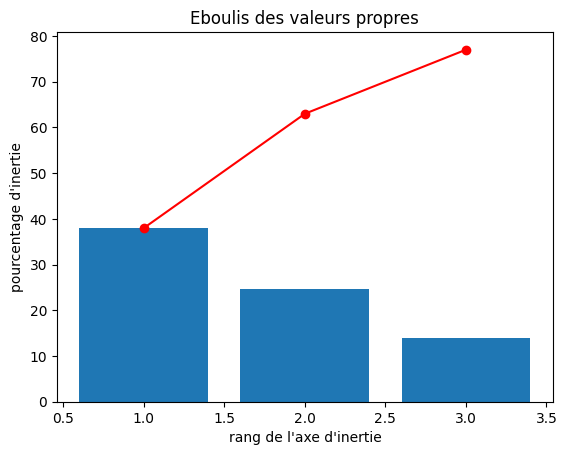

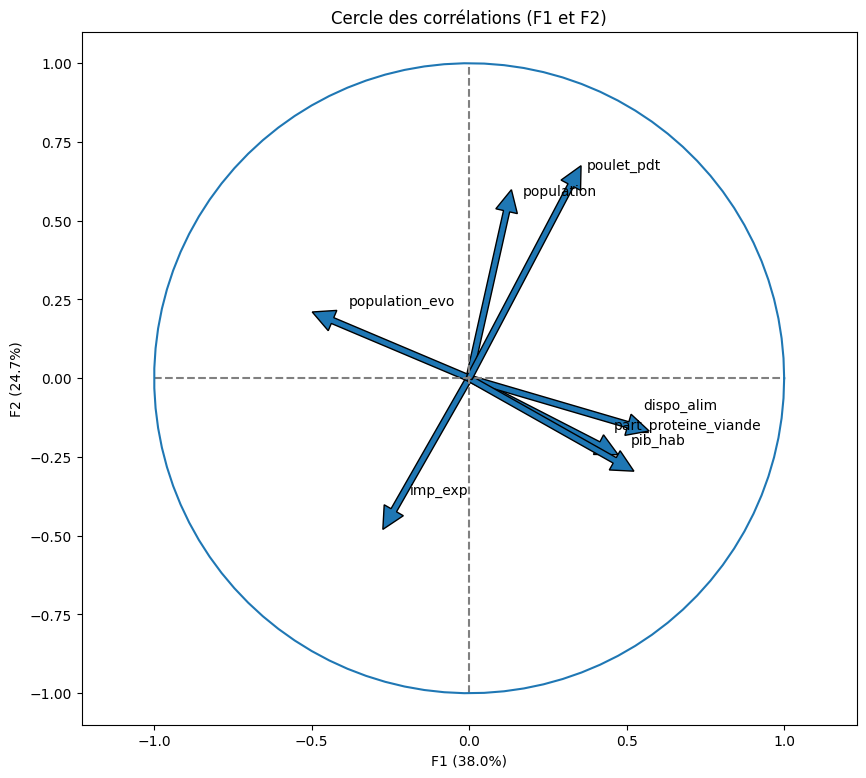

In [346]:
from sklearn.decomposition import PCA

features = dfCentreReduit.columns
names = dfCentreReduit.index

X = dfCentreReduit.values

n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X)

scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red", marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

x_y = (0, 1)
correlation_graph(pca, x_y, features)


<AxesSubplot: >

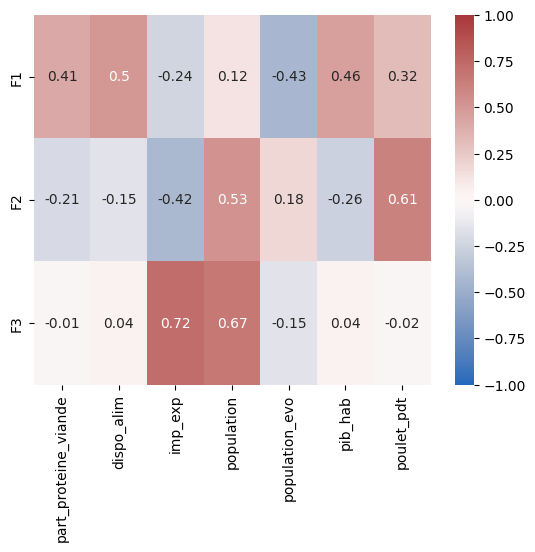

In [347]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
sns.heatmap(pcs.round(2), vmin=-1, vmax=1, cmap="vlag", annot=True)


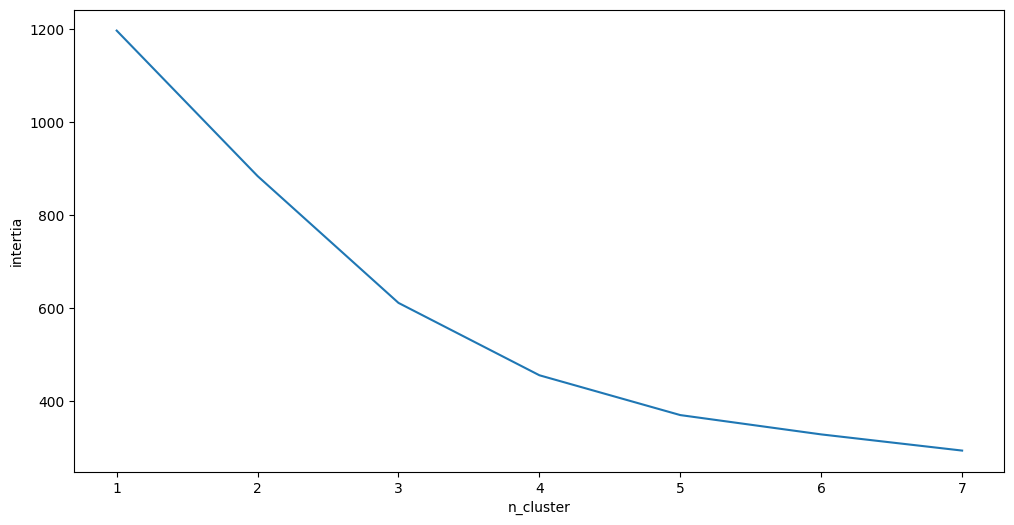

In [348]:
# K-means
from sklearn.cluster import KMeans
# Une liste vide pour enregistrer les inerties :
intertia_list = []

# Notre liste de nombres de clusters :
k_list = range(1, 8)

# Pour chaque nombre de clusters :
for k in k_list:

    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, n_init=40)

    # On entraine
    kmeans.fit(dfCentreReduit)

    # On enregistre l'inertie obtenue :
    intertia_list.append(kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)


On choisi de garder 3 clusters

In [349]:
n_clusters = 3


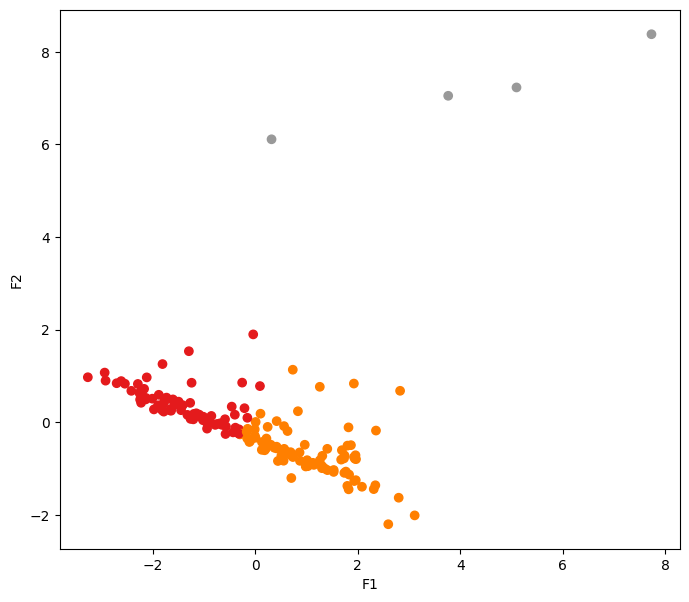

In [350]:
n_components = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(dfCentreReduit)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pca = PCA(n_components=n_components)
pca.fit(dfCentreReduit)
X_proj = pca.transform(dfCentreReduit)
X_proj = pd.DataFrame(X_proj, columns=["PC"+str(i+1)
                      for i in range(n_components)])
X_proj[:10]
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c=labels, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

fig = px.scatter_3d(X_proj, x='PC1', y='PC2', z='PC3',
                    opacity=0.3, color=labels)
fig.show()


Faisons un zoom sur les points en bas à gauche

In [351]:
df['Cluster'] = kmeans.labels_
list_cluster_petit = []
for i in range(0, n_clusters):
    long = len(df.query('Cluster==@i'))
    if (long > 0) and (long < 6):
        print("le cluster", i, "est le petit cluster")
        list_cluster_petit.append(i)


le cluster 2 est le petit cluster


In [352]:
df.query('Cluster in @list_cluster_petit')


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster
Pays,,,,,,,,
Brésil,14.58,3346.0,-4042.0,2.125594e+08,0.715420,14064.000000,13787480.28,2
"Chine, continentale",14.21,3343.0,1029.0,1.439324e+09,0.386397,17176.865661,14600000.00,2
Inde,0.73,2593.0,-4.0,1.380004e+09,0.994325,6186.600000,4472690.00,2
États-Unis d'Amérique,14.31,3920.0,-3743.0,3.310026e+08,0.588859,59755.200000,20514868.64,2


In [353]:
# On supprime le Brésil et les États-Unis d'Amérique qui sont 2 gros pays exportateurs de poulets.

df = df.query('Pays not in ["Brésil", "États-Unis d\'Amérique"]')

# On supprime également l'Inde qui ne mange pas beaucoup de viande

df = df.query('Pays not in ["Inde", "Chine, continentale"]')

# On supprime la colonne Cluster afin de les redéfinir

df = df.drop(columns='Cluster')

dfCentreReduit = df.sub(
    df.mean(numeric_only=True))
dfCentreReduit = dfCentreReduit.div(dfCentreReduit.std())

dfCentreReduit.describe().round(2)


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt
count,168.00,168.00,168.00,168.00,168.00,168.00,168.00
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.56,-2.57,-6.27,-0.60,-2.44,-0.95,-0.52
25%,-0.72,-0.68,-0.11,-0.54,-0.75,-0.75,-0.50
50%,-0.06,0.00,-0.07,-0.39,-0.11,-0.35,-0.42
75%,0.60,0.85,0.05,0.14,0.69,0.41,-0.19
max,4.02,2.06,4.78,5.95,2.45,4.78,5.61


# ACP après avoir retiré les pays isolés

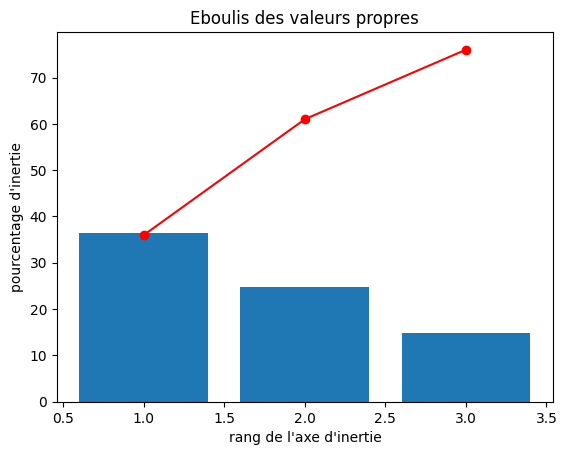

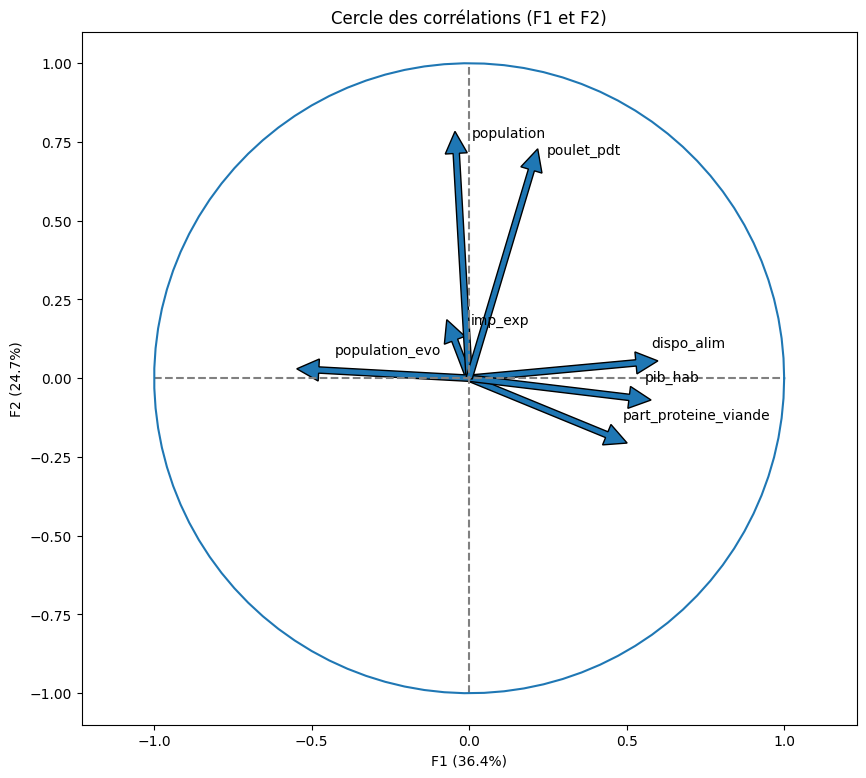

In [354]:

features = dfCentreReduit.columns
names = dfCentreReduit.index

X = dfCentreReduit.values

n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X)

scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red", marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

x_y = (0, 1)
correlation_graph(pca, x_y, features)


<AxesSubplot: >

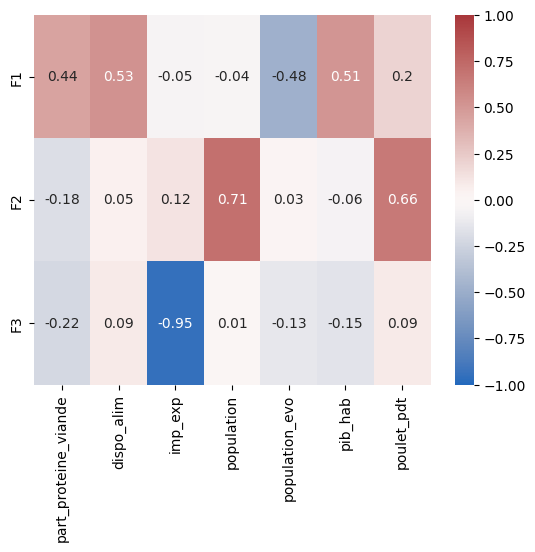

In [355]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
sns.heatmap(pcs.round(2), vmin=-1, vmax=1, cmap="vlag", annot=True)


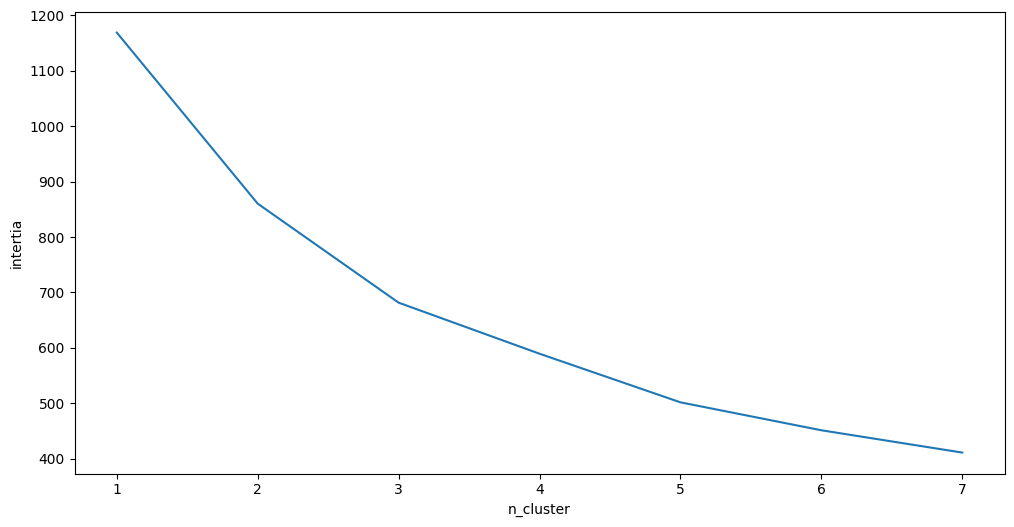

In [356]:
# K-means
from sklearn.cluster import KMeans
# Une liste vide pour enregistrer les inerties :
intertia_list = []

# Notre liste de nombres de clusters :
k_list = range(1, 8)

# Pour chaque nombre de clusters :
for k in k_list:

    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, n_init=40)

    # On entraine
    kmeans.fit(dfCentreReduit)

    # On enregistre l'inertie obtenue :
    intertia_list.append(kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)


On choisi de garder 3 clusters

In [357]:
n_clusters = 3


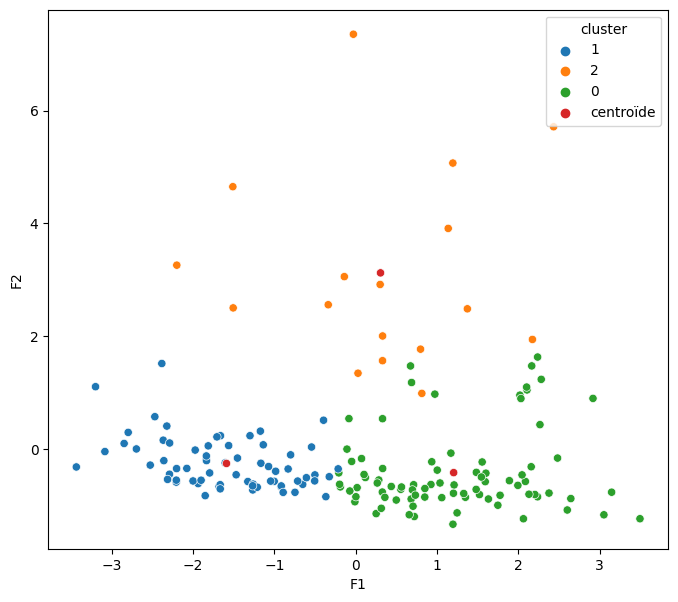

In [358]:
n_components = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(dfCentreReduit)
labels = kmeans.labels_
pca = PCA(n_components=n_components)
pca.fit(dfCentreReduit)
centroids = kmeans.cluster_centers_

X_proj = pca.transform(dfCentreReduit)
X_proj = pd.DataFrame(X_proj, columns=["PC"+str(i+1)
                      for i in range(n_components)])
X_proj['cluster'] = labels

centroides = X_proj.groupby(['cluster']).mean().reset_index()
centroides['cluster'] = 'centroïde'

X_proj = pd.concat([X_proj, centroides])
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

ax = sns.scatterplot(X_proj, x='PC1', y='PC2', hue='cluster')

ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()


fig = px.scatter_3d(X_proj, x='PC1', y='PC2', z='PC3',
                    opacity=0.3, color='cluster')
fig.show()


In [359]:
centroids = pd.DataFrame(centroids, columns=df.columns)
centroids['Cluster'] = 'Centroides'
centroids.index.names = ['Pays']
centroids


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster
Pays,,,,,,,,
0,0.600356,0.604544,-0.197813,-0.297023,-0.672452,0.584540,-0.085372,Centroides
1,-0.700065,-0.810081,0.023982,-0.186929,0.858592,-0.719372,-0.427156,Centroides
2,-0.207383,0.205512,0.882914,2.204363,-0.061159,-0.053142,2.105335,Centroides


In [360]:
df['Cluster'] = kmeans.labels_
dfCentreReduit['Cluster'] = kmeans.labels_
dfCentreReduit = pd.concat([dfCentreReduit, centroids])
dfCentreReduit


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster
Pays,,,,,,,,
Afghanistan,-1.207996,-1.485377,0.058336,0.332085,1.027347,-0.885745,-0.479426,1
Afrique du Sud,0.708405,-0.133802,1.698977,0.820455,0.040495,-0.337698,1.999957,2
Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,0
Algérie,-1.172312,1.250685,-0.120205,0.450046,0.578564,-0.436616,-0.171508,1
Allemagne,0.164760,1.566638,0.806275,1.406950,-0.864344,1.648323,0.910351,0
...,...,...,...,...,...,...,...,...
Éthiopie,-1.331838,-1.118960,-0.110554,2.154102,1.256267,-0.869025,-0.426021,1
Îles Salomon,-1.046371,-1.226472,-0.091252,-0.584288,1.230864,-0.859519,-0.516197,1
0,0.600356,0.604544,-0.197813,-0.297023,-0.672452,0.584540,-0.085372,Centroides


# Classification ascendante hiérarchique (Dendogramme)

In [361]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(dfCentreReduit.drop(columns='Cluster'), method="ward")


In [362]:
from scipy.cluster.hierarchy import fcluster

dendrogram_Cluster = fcluster(
    Z, 3, criterion='maxclust')-1  # Cluster 0, 1 ou 2


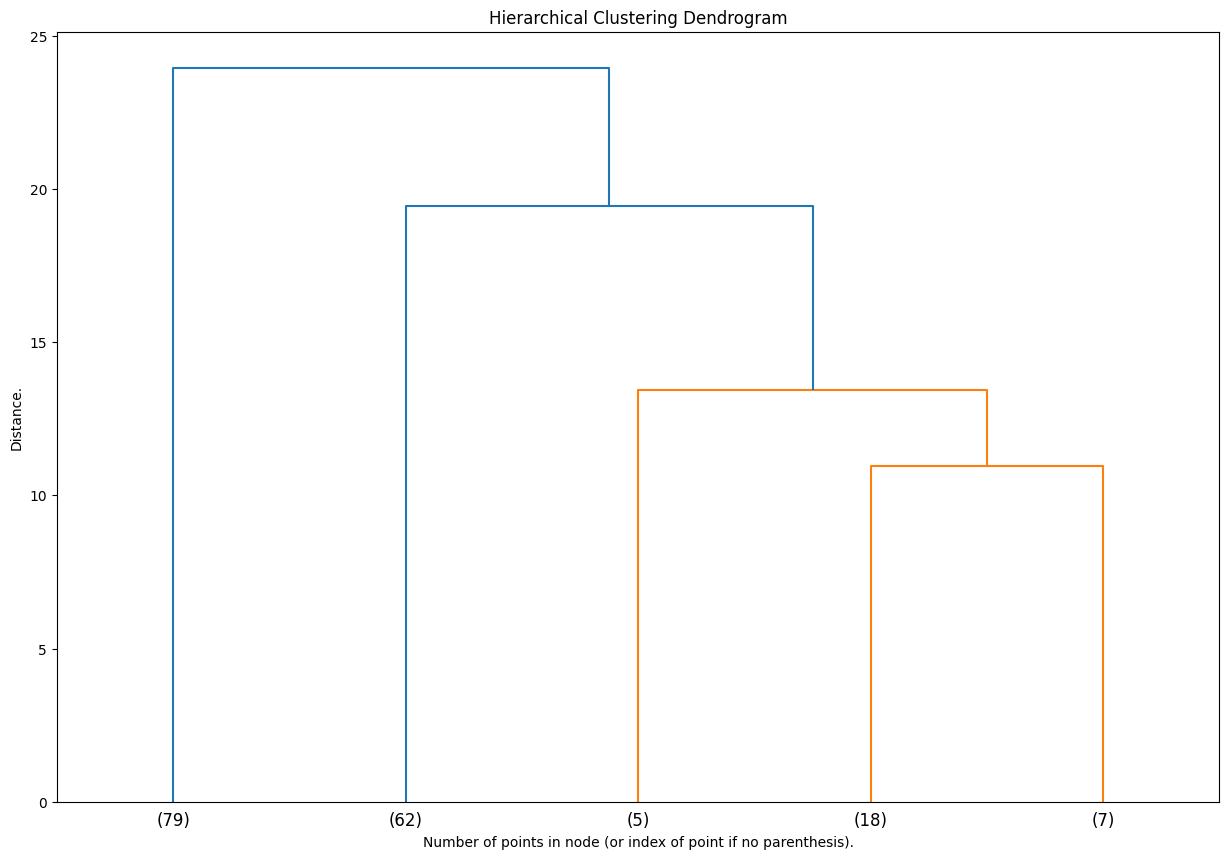

In [363]:

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

_ = dendrogram(Z, p=5, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()


In [364]:
dfCentreReduit['Cluster_dendo'] = dendrogram_Cluster
# df['Cluster_dendo'] = dendrogram_Cluster


# Comparons les deux méthodes

In [365]:
pd.crosstab(dfCentreReduit.Cluster, dfCentreReduit.Cluster_dendo)


Cluster_dendo,0,1,2
Cluster,,,
0,12,59,13
1,66,1,0
2,0,1,16
Centroides,1,1,1


In [366]:
dfCentreReduit['Cluster_dendo'] = dfCentreReduit['Cluster_dendo'].map({
    0: 0,
    1: 2,
    2: 1
})


In [367]:
dfCentreReduit.query("Cluster != Cluster_dendo")


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo
Pays,,,,,,,,,
Afghanistan,-1.207996,-1.485377,0.058336,0.332085,1.027347,-0.885745,-0.479426,1,0
Afrique du Sud,0.708405,-0.133802,1.698977,0.820455,0.040495,-0.337698,1.999957,2,1
Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,0,2
Algérie,-1.172312,1.250685,-0.120205,0.450046,0.578564,-0.436616,-0.171508,1,0
Allemagne,0.164760,1.566638,0.806275,1.406950,-0.864344,1.648323,0.910351,0,1
...,...,...,...,...,...,...,...,...,...
Éthiopie,-1.331838,-1.118960,-0.110554,2.154102,1.256267,-0.869025,-0.426021,1,0
Îles Salomon,-1.046371,-1.226472,-0.091252,-0.584288,1.230864,-0.859519,-0.516197,1,0
0,0.600356,0.604544,-0.197813,-0.297023,-0.672452,0.584540,-0.085372,Centroides,2


# Affichons la carte du monde

In [368]:
iso3 = pd.read_csv('data\FAOSTAT_Code_pays_vers_ISO3.csv')[
    ['Pays', 'Code ISO3']].rename(columns={'Code ISO3': 'iso3'})
iso3


,Pays,iso3
0,Afghanistan,AFG
1,Afrique,X06
2,Afrique australe,F5104
3,Afrique centrale,F5102
4,Afrique du Nord (Soudan Excl),F429
...,...,...
338,Yémen,YEM
339,Yemen Dém,F247
340,Yémen Rép A,F246
341,Zambie,ZMB


In [369]:
import plotly.express as px

df = pd.merge(df.reset_index(), iso3, on='Pays', how='left')
dfCentreReduit = pd.merge(dfCentreReduit.reset_index(),
                          iso3, on='Pays', how='left')

iso3_continent_url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'

continent = pd.read_csv(iso3_continent_url)[
    ['alpha-3', 'region']].rename(columns={"alpha-3": "iso3", "region": "continent"})

continent


,iso3,continent
0,AFG,Asia
1,ALA,Europe
2,ALB,Europe
3,DZA,Africa
4,ASM,Oceania
...,...,...
244,WLF,Oceania
245,ESH,Africa
246,YEM,Asia
247,ZMB,Africa


In [370]:
dfCentreReduit


,Pays,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo,iso3
0,Afghanistan,-1.207996,-1.485377,0.058336,0.332085,1.027347,-0.885745,-0.479426,1,0,AFG
1,Afrique du Sud,0.708405,-0.133802,1.698977,0.820455,0.040495,-0.337698,1.999957,2,1,ZAF
2,Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,0,2,ALB
3,Algérie,-1.172312,1.250685,-0.120205,0.450046,0.578564,-0.436616,-0.171508,1,0,DZA
4,Allemagne,0.164760,1.566638,0.806275,1.406950,-0.864344,1.648323,0.910351,0,1,DEU
...,...,...,...,...,...,...,...,...,...,...,...
166,Éthiopie,-1.331838,-1.118960,-0.110554,2.154102,1.256267,-0.869025,-0.426021,1,0,ETH
167,Îles Salomon,-1.046371,-1.226472,-0.091252,-0.584288,1.230864,-0.859519,-0.516197,1,0,SLB
168,0,0.600356,0.604544,-0.197813,-0.297023,-0.672452,0.584540,-0.085372,Centroides,2,NaN
169,1,-0.700065,-0.810081,0.023982,-0.186929,0.858592,-0.719372,-0.427156,Centroides,0,NaN


In [371]:
dfCentreReduit = pd.merge(dfCentreReduit.reset_index(), continent, on='iso3', how='left').set_index(
    'Pays').drop(columns="index")  # .drop(columns='iso_alpha')

dataframe = dataframe.sub(
    dataframe.mean(numeric_only=True))
dataframe = dataframe.div(dataframe.std())


dfCentreReduit = pd.merge(dfCentreReduit, dataframe,
                          on='Pays', suffixes=('', '_y'), how='left')
dfCentreReduit.drop(dfCentreReduit.filter(
    regex='_y$').columns, axis=1, inplace=True)


dfCentreReduit.describe()


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster_dendo,part_Kcal_viande,stab_pol,stab_pol_evo,pib_evo,nb_poulets,pib
count,171.000000,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,-0.001796,-1.455762e-07,0.004147,0.010061,0.000731,-0.001099,0.009315,0.900585,-0.005730,0.006243,0.004154,-0.007948,-0.096390,-0.123039
std,0.993784,9.942894e-01,0.993557,1.005763,0.994671,0.993691,1.004716,0.905246,0.987574,1.009253,1.008582,1.007260,0.608494,0.312637
min,-1.560630,-2.569271e+00,-6.272609,-0.600488,-2.437746,-0.949260,-0.516577,0.000000,-1.813998,-2.913320,-2.224472,-6.416268,-0.278187,-0.281265
25%,-0.717876,-6.812339e-01,-0.110554,-0.541349,-0.743188,-0.741180,-0.502517,0.000000,-0.670032,-0.616983,-0.175082,-0.352767,-0.269396,-0.270868
50%,-0.068230,8.815645e-03,-0.067125,-0.374315,-0.099545,-0.344144,-0.423697,1.000000,0.019789,0.067793,-0.100560,0.120020,-0.240695,-0.246347
75%,0.599806,8.283180e-01,0.055923,0.146034,0.695708,0.413031,-0.173373,2.000000,0.579343,0.873574,-0.015824,0.439938,-0.162119,-0.149188
max,4.018552,2.060314e+00,4.782418,5.953643,2.450365,4.780962,5.609754,2.000000,3.094585,1.728857,10.076478,6.386143,6.640785,1.683524


In [372]:
dfCentreReduit


,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo,iso3,continent,part_Kcal_viande,stab_pol,stab_pol_evo,pib_evo,nb_poulets,pib
Pays,,,,,,,,,,,,,,,,,
Afghanistan,-1.207996,-1.485377,0.058336,0.332085,1.027347,-0.885745,-0.479426,1,0,AFG,Asia,-1.389493,-2.913320,-0.086875,0.162938,-0.251652,-0.251480
Afrique du Sud,0.708405,-0.133802,1.698977,0.820455,0.040495,-0.337698,1.999957,2,1,ZAF,Africa,1.162321,-0.174216,-0.174314,-0.237162,0.052209,0.010899
Albanie,-0.244548,0.846968,0.010082,-0.531787,-1.266828,-0.307572,-0.500201,0,2,ALB,Europe,-0.653301,0.177797,-0.277143,0.379140,-0.265069,-0.266484
Algérie,-1.172312,1.250685,-0.120205,0.450046,0.578564,-0.436616,-0.171508,1,0,DZA,Africa,-1.334039,-0.856242,-0.213740,-0.133435,-0.013823,-0.098192
Allemagne,0.164760,1.566638,0.806275,1.406950,-0.864344,1.648323,0.910351,0,1,DEU,Europe,0.267417,0.826822,0.008005,0.152937,-0.240695,1.394700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Éthiopie,-1.331838,-1.118960,-0.110554,2.154102,1.256267,-0.869025,-0.426021,1,0,ETH,Africa,-1.621823,-1.824279,0.105229,1.210219,-0.167744,-0.178600
Îles Salomon,-1.046371,-1.226472,-0.091252,-0.584288,1.230864,-0.859519,-0.516197,1,0,SLB,Oceania,-1.182977,0.793821,0.058564,-0.115997,-0.277722,-0.280658
0,0.600356,0.604544,-0.197813,-0.297023,-0.672452,0.584540,-0.085372,Centroides,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
fig = px.choropleth(dfCentreReduit, locations="iso3", color="Cluster",
                    width=1800, height=700)

fig.show()


In [374]:
fig = px.choropleth(dfCentreReduit, locations="iso3", color="Cluster_dendo",
                    width=1800, height=700)

fig.show()


In [376]:
pd.crosstab(dfCentreReduit.Cluster, dfCentreReduit.continent, normalize='index')


continent,Africa,Americas,Asia,Europe,Oceania
Cluster,,,,,
0,0.047619,0.238095,0.238095,0.416667,0.059524
1,0.626866,0.119403,0.179104,0.000000,0.074627
2,0.176471,0.176471,0.529412,0.117647,0.000000


In [377]:
pd.crosstab(dfCentreReduit.Cluster, dfCentreReduit.continent, normalize='columns')


continent,Africa,Americas,Asia,Europe,Oceania
Cluster,,,,,
0,0.081633,0.645161,0.487805,0.945946,0.5
1,0.857143,0.258065,0.292683,0.000000,0.5
2,0.061224,0.096774,0.219512,0.054054,0.0


# Choix du Cluster

Choisissons maintenant le Cluster dans lequel nous voudrons exporter nos poulets

Nous ciblerons de préférence un pays ayant :
 <br>
 > Ayant un fort PIB par habitant,
 <br>
 Une grande consommation de viandes de volailles,
 <br>
 Une grande quantité d'importation,
 <br>
 Une forte disponibilité alimentaire

In [378]:
meanprops = {"marker": ".",
             "markerfacecolor": "white",
             "markeredgecolor": "black",
             "markersize": 15}


## Étude sur le PIB

<AxesSubplot: xlabel='Cluster', ylabel='pib_hab'>

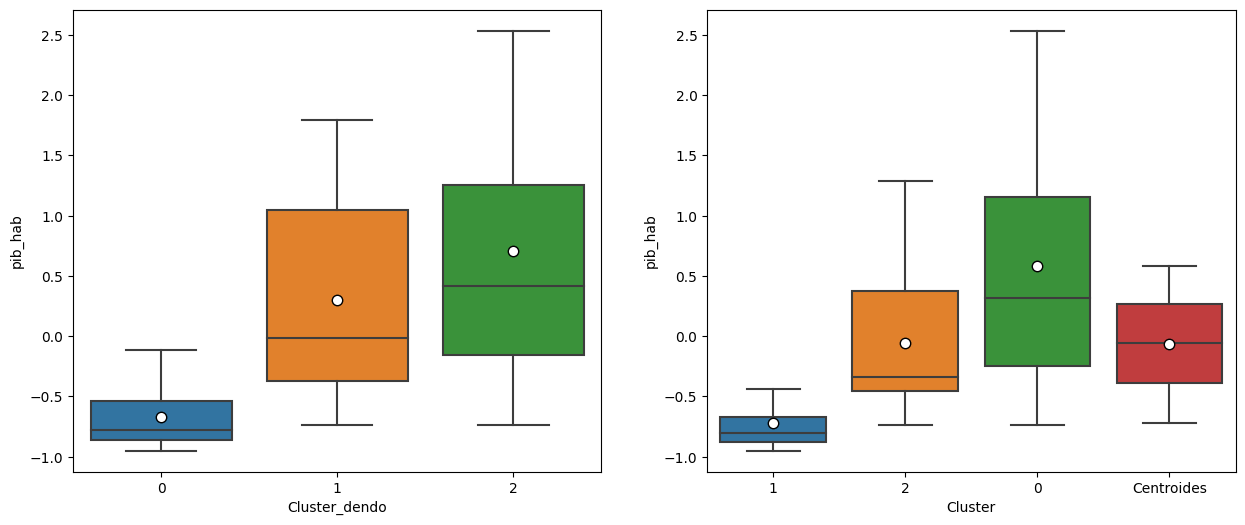

In [379]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(dfCentreReduit, x='Cluster_dendo', y='pib_hab', ax=ax1,
            showfliers=False, showmeans=True, meanprops=meanprops)
sns.boxplot(dfCentreReduit, x='Cluster', y='pib_hab', ax=ax2,
            showfliers=False, showmeans=True, meanprops=meanprops)


## Étude sur la disponibilité alimentaire

<AxesSubplot: xlabel='Cluster', ylabel='dispo_alim'>

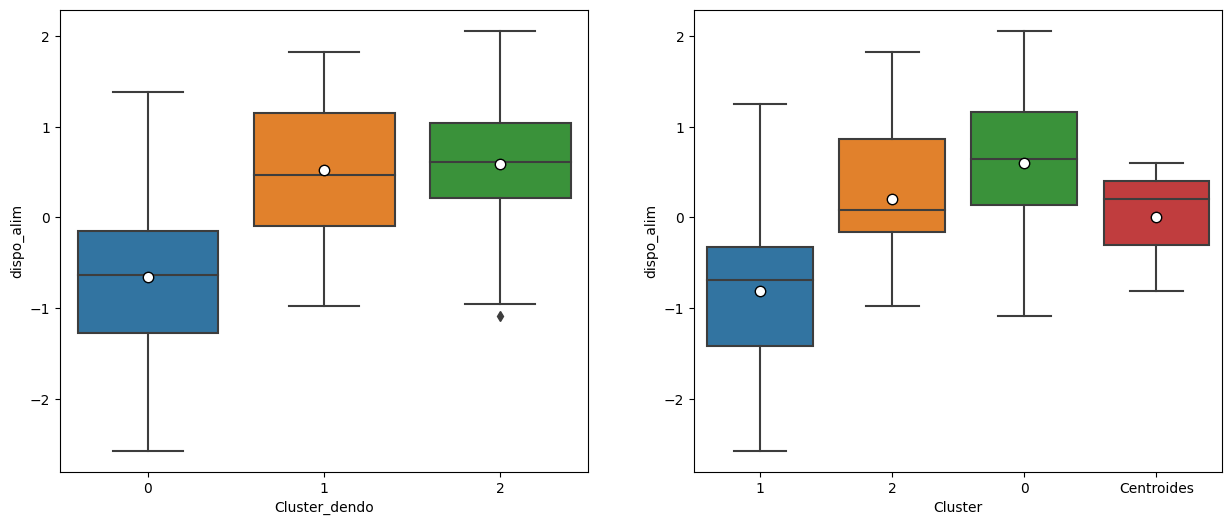

In [380]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(dfCentreReduit, x='Cluster_dendo', y='dispo_alim',
            ax=ax1, showmeans=True, meanprops=meanprops)
sns.boxplot(dfCentreReduit, x='Cluster', y='dispo_alim', ax=ax2,
            showfliers=False, showmeans=True, meanprops=meanprops)


## Étude sur la part de la viande dans la consommation alimentaire

<AxesSubplot: xlabel='Cluster', ylabel='part_proteine_viande'>

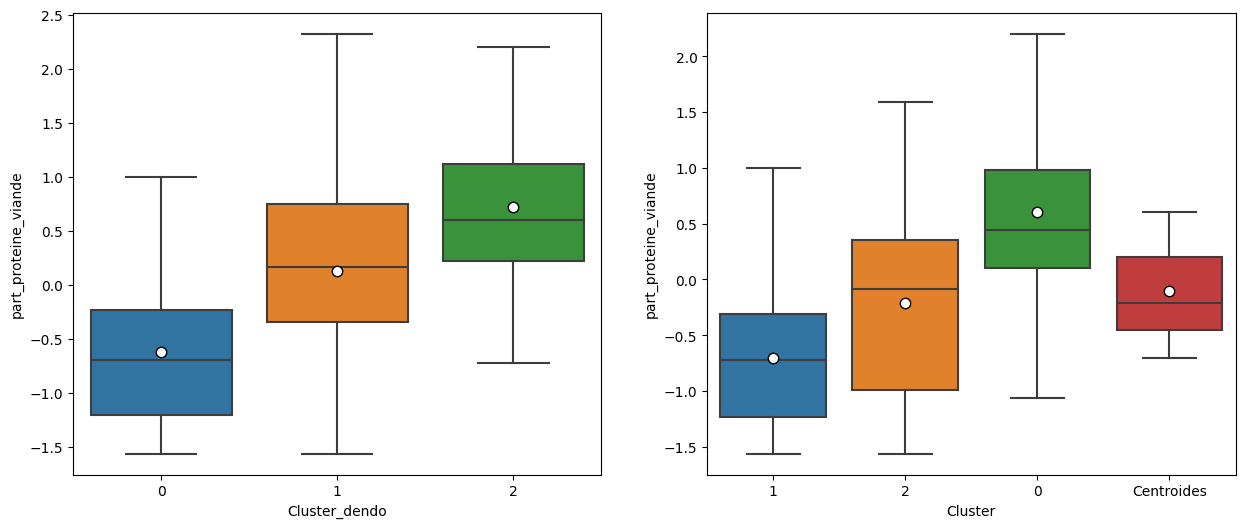

In [381]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(dfCentreReduit, x='Cluster_dendo', y='part_proteine_viande',
            showfliers=False, ax=ax1, showmeans=True, meanprops=meanprops)
sns.boxplot(dfCentreReduit, x='Cluster', y='part_proteine_viande',
            ax=ax2, showmeans=True, meanprops=meanprops, showfliers=False)


## Étude sur les imports-exports de poulets

<AxesSubplot: xlabel='Cluster', ylabel='imp_exp'>

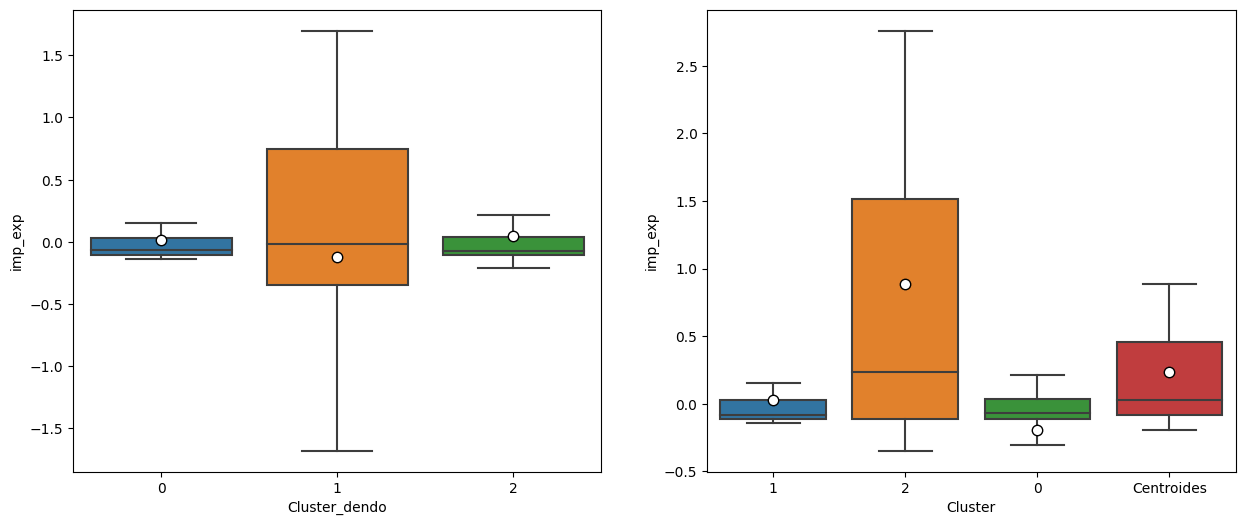

In [382]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(dfCentreReduit, x='Cluster_dendo', y='imp_exp',
            showfliers=False, showmeans=True, meanprops=meanprops, ax=ax1)
sns.boxplot(dfCentreReduit, x='Cluster', y='imp_exp',
            showmeans=True, meanprops=meanprops, showfliers=False, ax=ax2)


## Étude sur la production interne de viande de poulet

<AxesSubplot: xlabel='Cluster', ylabel='poulet_pdt'>

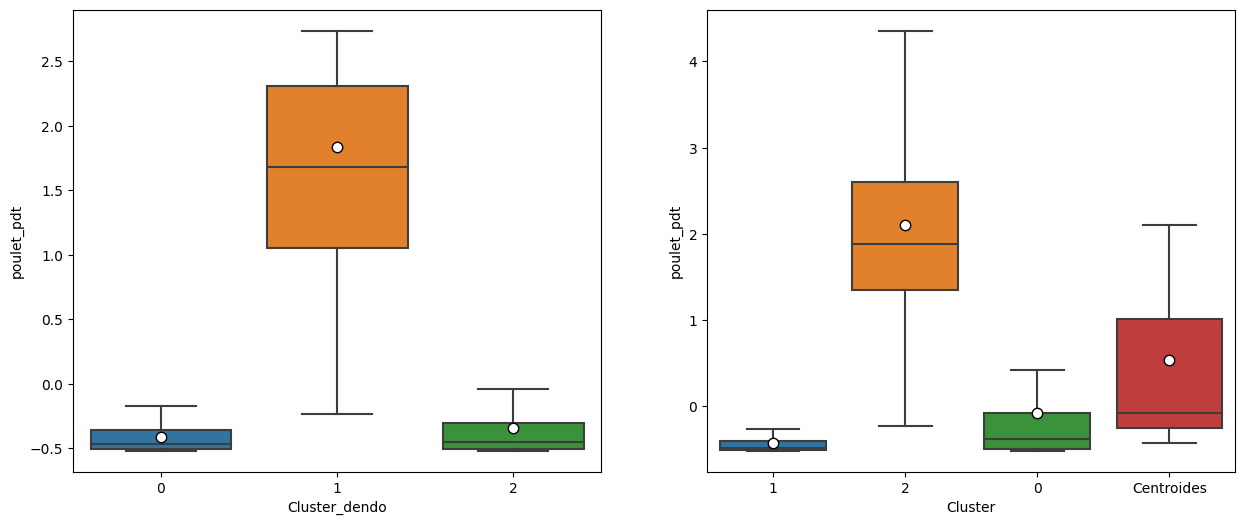

In [383]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(dfCentreReduit, x='Cluster_dendo', y='poulet_pdt', ax=ax1,
            showfliers=False, showmeans=True, meanprops=meanprops)
sns.boxplot(dfCentreReduit, x='Cluster', y='poulet_pdt',
            showfliers=False, ax=ax2, showmeans=True, meanprops=meanprops)


# Tableau récapitulatif

In [384]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def creerTableau(tab):

    signe_to_int = {"--": 0, "-": 1, "+": 2, "++": 3, " ": 4}
    colors = ['red', "salmon", "lightgreen", "mediumseagreen", "lightgrey"]

    Liste_col_int = [np.array(tab[col].map(signe_to_int))
                     for col in list(tab.columns)]
    col = ["paleturquoise"] + [np.array(colors)[col_val_map]
                               for col_val_map in Liste_col_int]

    tab = tab.reset_index(names="Critère\Cluster")

    fig = go.Figure(data=[go.Table(
        header=dict(values=list(tab.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[tab[i] for i in tab.columns],
                   fill_color=col,
                   align='left'))
    ])

    fig.show()
    return


In [385]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def creerTableau(tab, tab2):

    fig = make_subplots(rows=1, cols=2, specs=[[{"type": "table"}, {
                        "type": "table"}]], row_heights=[1000], column_widths=[2000, 2000])

    signe_to_int = {"--": 0, "-": 1, "+": 2, "++": 3, " ": 4}
    colors = ['red', "salmon", "lightgreen", "mediumseagreen", "lightgrey"]

    Liste_col_int = [np.array(tab[col].map(signe_to_int))
                     for col in list(tab.columns)]
    col = ["paleturquoise"] + [np.array(colors)[col_val_map]
                               for col_val_map in Liste_col_int]

    tab = tab.reset_index(names="Critère\Cluster")
    fig.add_trace(go.Table(
        header=dict(values=list(tab.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[tab[i] for i in tab.columns],
                   fill_color=col,
                   align='left')), row=1, col=1)

    Liste_col_int = [np.array(tab2[col].map(signe_to_int))
                     for col in list(tab2.columns)]
    col = ["paleturquoise"] + [np.array(colors)[col_val_map]
                               for col_val_map in Liste_col_int]

    tab2 = tab2.reset_index(names="Critère\Cluster")
    fig.add_trace(go.Table(
        header=dict(values=list(tab2.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[tab2[i] for i in tab2.columns],
                   fill_color=col,
                   align='left')), col=2, row=1)

    fig.show()
    return


In [386]:
df['Cluster'].value_counts()


0    84
1    67
2    17
Name: Cluster, dtype: int64

In [387]:

Critére = ["PIB", "disponibilité alimentaire", "Part de la viande",
           "imports-exports", "Production de viande de poulet"]
colonne = [i for i in range(0, n_clusters)]

tableau = pd.DataFrame(index=Critére, columns=colonne)

list_0 = [" ", "-", " ", " ", " "]  # PAYS PRODUCTEURS (AFRIQUE)
list_1 = ["++", " ", " ", "++", "-"]  # Europe
list_2 = ["+", " ", " ", " ", " "]  # Russie + autres

list_all = [list_0, list_1, list_2]
clust = 0
for liste in list_all:
    for i, j in zip(liste, Critére):
        tableau.at[j, clust] = i
    clust = clust + 1

tableau_Cluster = pd.DataFrame(index=Critére, columns=colonne)

list_0 = [" ", "-", " ", " ", "+"]  # PAYS PRODUCTEURS (AFRIQUE)
list_1 = ["++", " ", " ", " ", "-"]  # Europe
list_2 = ["+", " ", " ", " ", " "]  # Russie + autres

list_all = [list_0, list_1, list_2]
clust = 0
for liste in list_all:
    for i, j in zip(liste, Critére):
        tableau_Cluster.at[j, clust] = i
    clust = clust + 1


In [388]:
creerTableau(tableau, tableau_Cluster)


## Étude des centroïdes

<AxesSubplot: xlabel='Pays'>

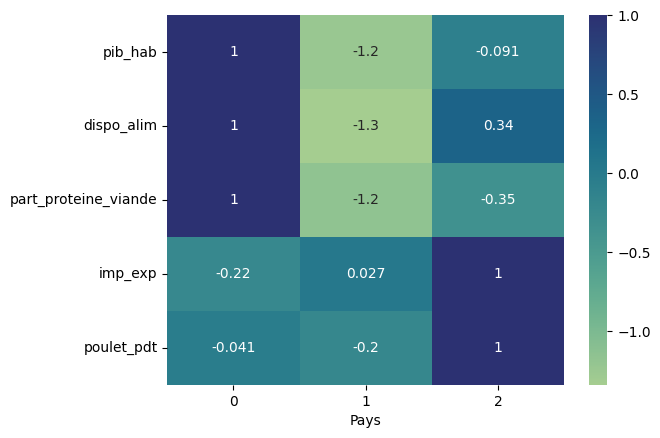

In [389]:
Critére = ["pib_hab", "dispo_alim",
           "part_proteine_viande", "imp_exp", "poulet_pdt"]
dfCentroid = dfCentreReduit.query("Cluster=='Centroides'")[Critére].T
sns.heatmap(dfCentroid.div(dfCentroid.max(axis=1), axis=0),
            annot=True, cmap="crest")


# Cluster retenu

In [390]:
df.query('Cluster==0')


,Pays,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,iso3
2,Albanie,7.09,3302.0,26.0,2877800.0,-0.108299,13253.7,12233.91,0,ALB
4,Allemagne,9.04,3630.0,191.0,83783940.0,0.319576,51423.2,1066000.00,0,DEU
6,Antigua-et-Barbuda,16.64,2422.0,6.0,97930.0,0.834020,17293.3,15.60,0,ATG
8,Argentine,19.33,3336.0,-176.0,45195770.0,0.926940,19690.7,2219238.25,0,ARG
9,Arménie,9.67,3215.0,33.0,2963240.0,0.186292,12619.9,12300.00,0,ARM
...,...,...,...,...,...,...,...,...,...,...
154,Tunisie,3.21,3547.0,0.0,11818620.0,1.059452,10314.0,144000.00,0,TUN
155,Turkménistan,11.16,2876.0,19.0,6031200.0,1.499641,15538.4,18088.94,0,TKM
157,Ukraine,7.69,2976.0,-324.0,43733760.0,-0.590722,12407.8,1344000.00,0,UKR
158,Uruguay,9.52,3203.0,7.0,3473730.0,0.346647,21548.1,69387.00,0,URY


In [391]:
df_retenu = dfCentreReduit.query(
    'Cluster==0 and continent in ["Europe"]')  # , "Africa", "Asia"

Lcolonne = list(dfCentreReduit.drop(columns=['Cluster', 'iso3']).columns)


fig = px.choropleth(df_retenu, locations="iso3", color="Cluster",
                    width=1800, height=700, basemap_visible=False)

fig.show()


In [404]:
df_retenu1 = df_retenu.query(
    "stab_pol>0 "
)
df_retenu1 = df_retenu[(df_retenu.stab_pol > 0) & 
                       (df_retenu.part_proteine_viande > df_retenu.part_proteine_viande.mean())]

df_retenu1

,part_proteine_viande,dispo_alim,imp_exp,population,population_evo,pib_hab,poulet_pdt,Cluster,Cluster_dendo,iso3,continent,part_Kcal_viande,stab_pol,stab_pol_evo,pib_evo,nb_poulets,pib
Pays,,,,,,,,,,,,,,,,,
Croatie,0.618147,0.535404,-0.071950,-0.502374,-1.735006,0.400766,-0.440746,0,2,HRV,Europe,0.527475,0.760820,-0.177388,-0.248254,-0.253957,-0.238080
Espagne,0.825950,0.947897,-0.346999,0.519628,-1.128728,0.868809,1.359325,0,1,ESP,Europe,0.975882,0.529811,0.081101,-0.715049,-0.240695,0.377283
Finlande,1.231060,0.985197,-0.091252,-0.467976,-1.019406,1.442031,-0.333339,0,2,FIN,Europe,-0.007938,1.123834,-0.036251,0.443066,-0.261711,-0.179162
France,0.849039,1.362585,0.565004,0.963388,-0.957296,1.181879,0.996020,0,1,FRA,Europe,0.271241,0.430807,-0.082410,-0.292108,0.190831,0.793280
Hongrie,0.821752,0.956674,-0.834366,-0.369259,-1.401270,0.610383,-0.042077,0,2,HUN,Europe,0.875492,1.035830,-0.029251,0.204178,-0.218363,-0.164195
Islande,1.558506,1.634656,-0.105728,-0.592570,-0.551777,1.697131,-0.504436,0,2,ISL,Europe,0.211008,1.618852,-0.200609,-0.288783,-0.277767,-0.274369
Lituanie,0.941396,1.233132,-0.149157,-0.535514,-2.437746,0.914732,-0.386654,0,2,LTU,Europe,0.382148,1.046831,-0.030205,0.742728,-0.261771,-0.242026
Luxembourg,1.445159,1.325285,-0.057474,-0.585747,0.400954,4.780962,-0.516577,0,2,LUX,Europe,0.601094,1.442846,-0.160175,0.316933,-0.277934,-0.253913
Monténégro,1.489239,1.222162,-0.076776,-0.585697,-1.152973,-0.051094,-0.514884,0,2,MNE,Europe,0.349641,0.089794,-0.739875,-1.234780,-0.277030,-0.276861


In [405]:

fig = px.choropleth(df_retenu1, locations="iso3", color="Cluster",
                    width=1800, height=700, basemap_visible=False)

fig.show()